# Python Tutorial 3

Hi there, 

in this tutorial we will learn about numerical integration and how to implement it in Python using scipy.

Let's assume, you want to integrate the following integral:

$\int_{a}^{b} f(x) dx$

With the linearity of the integral, you can write it as:

$\int_{a}^{b} f(x) dx = \sum_{i=0}^{N} \int_{x_i}^{x_{i+1}} f(x) dx$

where $x_i = a + ih$ and $h = (b-a)/N$. This ensures, that the $x_i$ are equally spaced.

If $x_i$ and $x_{i+1}$ are close to each other, the integral $\int_{x_i}^{x_{i+1}} f(x) dx$ can be approximated with different forms. 

## Rectangle rule

The rectangle rule is the simplest form of the integral. Each integral in the summation is approximated by a rectangle. 

$\int_{x_i}^{x_{i+1}} f(x) dx = (x_i - x_{i+1}) f(\frac{x_i + x_{i+1}}{2}) + \mathcal{O}(1/N^2)$

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Integration_rectangle.svg" alt="drawing" width="100%"/>

## Trapezoid rule

A little bit more complicated is the trapezoid rule. Each integral in the summation is approximated by a trapezoid.

$\int_{x_i}^{x_{i+1}} f(x) dx = (x_i - x_{i+1}) \frac{f(x_i) + f(x_{i+1})}{2} + \mathcal{O}(1/N^3)$

<img src="https://upload.wikimedia.org/wikipedia/commons/0/03/Integration_trapezoid.svg" alt="drawing" width="100%"/>

## Simpson's rule

The most complicated rule out of the three is the Simpson's rule. The function of each interval is represented by a polynomial of order 2 and integrating that polynomial instead. It's error goes with $\mathcal{O}(1/N^5)$.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/13/Integration_simpson.svg" alt="drawing" width="100%"/>

<style>
img {
  background-color: white;
}
</style>

As you can see, the error for these methods evolve differently for different values of $N$. It's important to keep in mind, that different methods also require different numbers of function calls. So if f(x) is a very expensive function without a lot of fluctuations, it's better to use the rectangle rule, than the trapezoid rule.

There is also a way, to vary the size of the intervals, but this is a more advanced method. 

Also keep in mind, that the methods presented here are just the common three out of many which are optimized for different problems. 



# Exercise 1

Program the rectangular and trapezoid rule in the next code block to integrate the function $f(x) = e^{-x}$ from $x=0$ to $x=1$. Compare it with the analytic result. Also vary the number of intervals and see what happens. 

In [1]:
# your solution goes inhere. 

The Simpson's rule is quiet complicated to implement and other integration methods can be even more complicated. For that reason, clever people have already done this for us and bundled them in a library. Scipy is such a library which contains a lot of methods for numerical calculations, as well as numerical integration. We will now take a look at some of there methods, but a full overview can be seen [here](https://docs.scipy.org/doc/scipy/reference/integrate.html).

## scipy.integrate.quad

let us first look at the quad method, which is made for directly integrating a function. It is based on the FORTRAN library QUADPACK. Scipy has generally a really good documentation we encourage you to take a look at [it](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad).

Let us first define the function we want to integrate. 

In [35]:
import numpy as np
import scipy.integrate as integrate

def f(x):
    return np.exp(-x)

result, error = integrate.quad(f, 0, 10)

print(result, error)

0.9999546000702375 2.8326146575791917e-14


The first number gives you the result, the second one the numerical error of the integrations. 

While you use quad to integrate a function directly, there are also other algorithms implemented, which operate on arrays. One of it is the trapezoid method, you already know. As said, the input is not a function but a x, y - numpy array. 

In [36]:
x = np.linspace(0, 100, 1000)
y = f(x)

integrate.trapezoid(y, x)

1.000834863090761

As you can see, the result is fairly similar to the quad method, but you don't have an error estimate. The last method we will be presenting here, is the simpson method, which works similar as the trapezoid method. 

In [37]:
integrate.simpson(y, x)

1.0000402922553666

Which one you use depends one the problem you are trying to solve. While quad works just with functions and the step size is estimated on the fly, the implementation of the trapezoid and simpson method work on arrays. Keep in mind, that you can convert an array into a function and a function into an array, for that, you can check the optional section, where we talk about interpolation. 

# Exercise 2

We want to look at the function

$y(x) = \int_0^{x} e^{-a\phi^2} d\phi$

where $a$ is a positive real number. We already know, that

$\int_0^{\infty} e^{-a x^2} dx = \sqrt{\frac{\pi}{4a}}$

1. So we can use this result, to check our integration. We don't want to recompute the integral for multiple values of $a$, so first, make a substitution to eliminate $a$ in the integral and absorb it as a pre factor. 

2. Write a function, which represents the integrand and a function `y(x)` which calculates the integral. 

3. Check that everything works, by calculating `y(np.inf)`. Use $a = 10$

4. Use the previous defined x array to compute the y array. Use $a = 10$ (Hint: you need a for loop for this one)

5. Plot your result. 

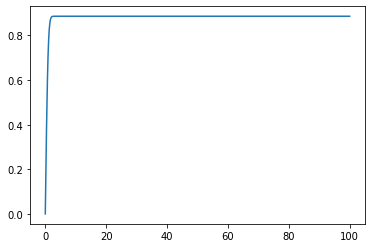

In [38]:
# definition

# Interpolation (optional)